
# Import Library

In [ ]:
#Import Library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from statsmodels. tsa.ar_model import AR
from sklearn.preprocessing import StandardScaler,LabelEncoder

# Prediksi Penggunaan Kuota

In [ ]:
#menghubungkan dataset dari spreadsheet
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1ENSbjy0gsvSqQZ-orBDoxmspjbNRKDvJjXd2g05TA0Q/edit?usp=sharing')
sheets = gsheets.worksheet('sim_byte_usage_dataset.csv').get_all_values()
df_kuota = pd.DataFrame(sheets[1:], columns=sheets[0])


In [ ]:
df_kuota

,data_time,gsm_number,usage_kb
0,2022-02-13 0:00:00,812345678,25.5
1,2022-02-13 1:00:00,812345678,60.5
2,2022-02-13 2:00:00,812345678,67.5
3,2022-02-13 3:00:00,812345678,74.5
4,2022-02-13 4:00:00,812345678,90
...,...,...,...
499,2022-02-19 19:00:00,811112222,1660.5
500,2022-02-19 20:00:00,811112222,1672
501,2022-02-19 21:00:00,811112222,1684
502,2022-02-19 22:00:00,811112222,1694.5


In [ ]:
df_kuota.info() #cek tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   data_time   504 non-null    object
 1   gsm_number  504 non-null    object
 2   usage_kb    504 non-null    object
dtypes: object(3)
memory usage: 11.9+ KB


In [ ]:
df_kuota['data_time'] = pd.to_datetime(df_kuota['data_time']) #ubah tipe data tanggal

In [ ]:
df_kuota['usage_kb'] = df_kuota['usage_kb'].astype(float) #ubah type menjadi float

In [ ]:
df_kuota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data_time   504 non-null    datetime64[ns]
 1   gsm_number  504 non-null    object        
 2   usage_kb    504 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 11.9+ KB


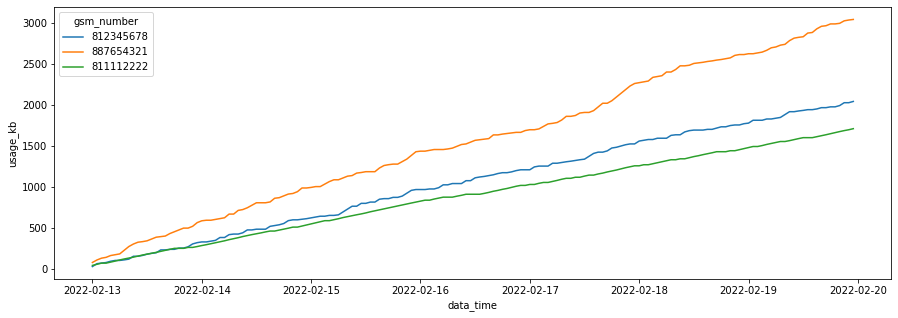

In [ ]:
plt.figure(figsize=[15,5])
sns.lineplot(x='data_time',y='usage_kb',hue='gsm_number',data=df_kuota) #visualisasikan data

In [ ]:
df_kuota['gsm_number'].unique()#melihat gsm number

array(['812345678', '887654321', '811112222'], dtype=object)

In [ ]:
#split data percustomer
df_cust1 = df_kuota[df_kuota['gsm_number']== '812345678']
df_cust2 = df_kuota[df_kuota['gsm_number']== '887654321']
df_cust3 = df_kuota[df_kuota['gsm_number']== '811112222']

In [ ]:
#drop gsm_number
df_cust1.drop(columns=['gsm_number'],inplace=True)
df_cust2.drop(columns=['gsm_number'],inplace=True)
df_cust3.drop(columns=['gsm_number'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#ubah date menjadi index
df_cust1.set_index('data_time',inplace=True)
df_cust2.set_index('data_time',inplace=True)
df_cust3.set_index('data_time',inplace=True)

In [ ]:
#prediksi customer 1
model1 = AR(df_cust1)
model_fitted1 = model1.fit()
predicts1 = model_fitted1.predict(start="2022-02-20", end="2022-02-23")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [ ]:
#prediksi customer 2
model2 = AR(df_cust2)
model_fitted2 = model2.fit()
predicts2 = model_fitted2.predict(start="2022-02-20", end="2022-02-23")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [ ]:
#prediksi customer 3
model3 = AR(df_cust3)
model_fitted3 = model3.fit()
predicts3 = model_fitted3.predict(start="2022-02-20", end="2022-02-23")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


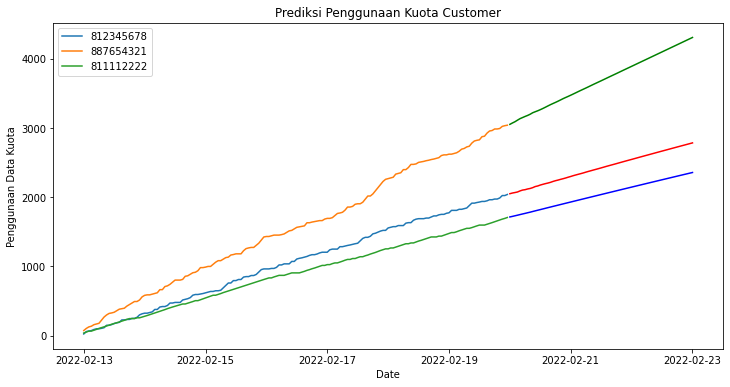

In [ ]:
#Visualisasi Hasil Prediksi
plt.figure(figsize=(12, 6))
sns.lineplot(x='data_time',y='usage_kb',hue='gsm_number',data=df_kuota) 
plt.plot(predicts1,'r')
plt.plot(predicts2,'g')
plt.plot(predicts3,'b')
plt.title('Prediksi Penggunaan Kuota Customer')
plt.ylabel('Penggunaan Data Kuota')
plt.xlabel('Date')
plt.legend(loc='best')
plt.grid(False)
plt.show()

# Deteksi Anomali

In [ ]:
#Koneksi Data Suhu Bulanan
gsheets2 = gc.open_by_url('https://docs.google.com/spreadsheets/d/12qPVolOMo5p4rCpYrz8qvg14uIwJDqZbbjMN88UO91E/edit?usp=sharing')
sheets2 = gsheets2.worksheet('lastmont_room_temp_dataset.csv').get_all_values()
df_temp_month = pd.DataFrame(sheets2[1:], columns=sheets2[0])

In [ ]:
df_temp_month

,data_time,room,temperature
0,2022-01-01 0:00:00,room_1,26
1,2022-01-01 1:00:00,room_1,26.5
2,2022-01-01 2:00:00,room_1,26.5
3,2022-01-01 3:00:00,room_1,25
4,2022-01-01 4:00:00,room_1,26.5
...,...,...,...
2227,2022-01-31 19:00:00,room_3,26.5
2228,2022-01-31 20:00:00,room_3,25.2
2229,2022-01-31 21:00:00,room_3,25.2
2230,2022-01-31 22:00:00,room_3,26


In [ ]:
df_temp_month.info() #Cek data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data_time    2232 non-null   object
 1   room         2232 non-null   object
 2   temperature  2232 non-null   object
dtypes: object(3)
memory usage: 52.4+ KB


In [ ]:
df_temp_month['temperature'] =df_temp_month['temperature'].astype(float) #merubah tipe data

In [ ]:
df_temp_month['data_time'] = pd.to_datetime(df_temp_month['data_time'])

In [ ]:
df_temp_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data_time    2232 non-null   datetime64[ns]
 1   room         2232 non-null   object        
 2   temperature  2232 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 52.4+ KB


In [ ]:
#Koneksi Data Suhu weekly
gsheets3 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1kWJqpvgTKi7r5fjQVQY9Wb5s6t-UFbrSgUTyGgALl_A/edit?usp=sharing')
sheets3 = gsheets3.worksheet('this_week_room_temp_dataset.csv').get_all_values()
df_temp_week = pd.DataFrame(sheets3[1:], columns=sheets3[0])

In [ ]:
df_temp_week

,data_time,room,temperature
0,2022-02-20 0:00:00,room_1,26.2
1,2022-02-20 1:00:00,room_1,25.2
2,2022-02-20 2:00:00,room_1,25
3,2022-02-20 3:00:00,room_1,26.2
4,2022-02-20 4:00:00,room_1,26.2
...,...,...,...
499,2022-02-26 19:00:00,room_3,26
500,2022-02-26 20:00:00,room_3,25.2
501,2022-02-26 21:00:00,room_3,25
502,2022-02-26 22:00:00,room_3,26.2


In [ ]:
df_temp_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data_time    504 non-null    object
 1   room         504 non-null    object
 2   temperature  504 non-null    object
dtypes: object(3)
memory usage: 11.9+ KB


In [ ]:
df_temp_week['temperature'] =df_temp_week['temperature'].astype(float) #merubah tipe data

In [ ]:
df_temp_week['data_time'] = pd.to_datetime(df_temp_week['data_time'])

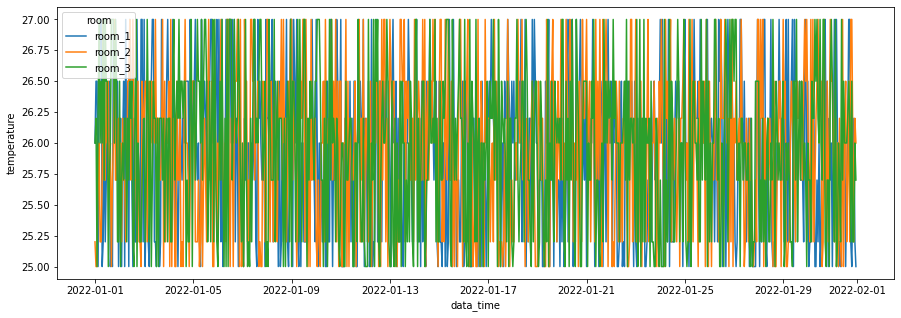

In [ ]:
#Visualisasi Data bulanan
plt.figure(figsize=[15,5])
sns.lineplot(x='data_time',y='temperature',hue='room',data=df_temp_month)

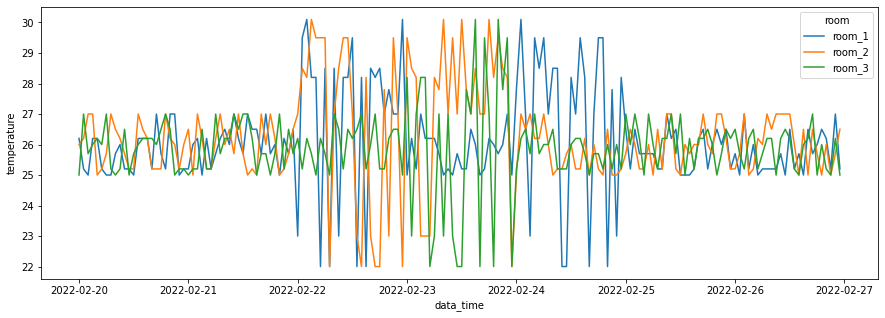

In [ ]:
#Visualisasi Data Mingguan
plt.figure(figsize=[15,5])
sns.lineplot(x='data_time',y='temperature',hue='room',data=df_temp_week)

In [ ]:
df_temp_month['temperature'].mean() #rata-rata suhu bulanan

25.94162186379884

In [ ]:
df_temp_week['temperature'].mean() #rata-rata suhu mingguan

26.073015873015986

In [ ]:
#Ekstraksi Fitur yang diperlukan untuk model
df_temp_month['Hour'] = df_temp_month['data_time'].dt.hour
df_temp_month['Month'] = df_temp_month['data_time'].dt.month
df_temp_month['Year'] = df_temp_month['data_time'].dt.year
df_temp_month['Day'] = df_temp_month['data_time'].dt.day

In [ ]:
#Ekstraksi Fitur yang diperlukan untuk model
df_temp_week['Hour'] = df_temp_week['data_time'].dt.hour
df_temp_week['Month'] = df_temp_week['data_time'].dt.month
df_temp_week['Year'] = df_temp_week['data_time'].dt.year
df_temp_week['Day'] = df_temp_week['data_time'].dt.day

In [ ]:
df_temp_month

,data_time,room,temperature,Hour,Month,Year,Day,anomaly
0,2022-01-01 00:00:00,room_1,26.0,0,1,2022,1,1
1,2022-01-01 01:00:00,room_1,26.5,1,1,2022,1,1
2,2022-01-01 02:00:00,room_1,26.5,2,1,2022,1,1
3,2022-01-01 03:00:00,room_1,25.0,3,1,2022,1,1
4,2022-01-01 04:00:00,room_1,26.5,4,1,2022,1,1
...,...,...,...,...,...,...,...,...
2227,2022-01-31 19:00:00,room_3,26.5,19,1,2022,31,1
2228,2022-01-31 20:00:00,room_3,25.2,20,1,2022,31,1
2229,2022-01-31 21:00:00,room_3,25.2,21,1,2022,31,1
2230,2022-01-31 22:00:00,room_3,26.0,22,1,2022,31,1


In [ ]:
df_temp_week

,data_time,room,temperature,Hour,Month,Year,Day,anomaly
0,2022-02-20 00:00:00,room_1,26.2,0,2,2022,20,-1
1,2022-02-20 01:00:00,room_1,25.2,1,2,2022,20,-1
2,2022-02-20 02:00:00,room_1,25.0,2,2,2022,20,-1
3,2022-02-20 03:00:00,room_1,26.2,3,2,2022,20,-1
4,2022-02-20 04:00:00,room_1,26.2,4,2,2022,20,-1
...,...,...,...,...,...,...,...,...
499,2022-02-26 19:00:00,room_3,26.0,19,2,2022,26,-1
500,2022-02-26 20:00:00,room_3,25.2,20,2,2022,26,-1
501,2022-02-26 21:00:00,room_3,25.0,21,2,2022,26,-1
502,2022-02-26 22:00:00,room_3,26.2,22,2,2022,26,-1


In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
le = LabelEncoder()
scaler = StandardScaler()

In [ ]:
data = df_temp_month[['room','temperature','Hour','Month','Year','Day']] #seleksi data

In [ ]:
data['room'] = le.fit_transform(data['room']) #ubah data categori ke bentuk angka

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data = scaler.fit_transform(data) #Normalisasi data

In [ ]:
model =  IsolationForest() #Train model
model.fit(data)

IsolationForest()

In [ ]:
df_temp_month['anomaly'] = pd.Series(model.predict(data)) #Prediksi untuk menentukan anomaly
df_temp_month['anomaly'] = df_temp_month['anomaly'].map( {1: 'Normal', -1: 'Anomaly'} )

In [ ]:
df_temp_month['anomaly'].value_counts()

Anomaly    1923
Normal      309
Name: anomaly, dtype: int64

In [ ]:
data_week = df_temp_week[['room','temperature','Hour','Month','Year','Day']] #Seleksi Data

In [ ]:
data_week['room'] = le.fit_transform(data_week['room']) #Transform data category

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_week = scaler.fit_transform(data_week) #normalisasi

In [ ]:
df_temp_week['anomaly'] = pd.Series(model.predict(data_week)) #prediksi anomaly dari model sebelumnya
df_temp_week['anomaly'] = df_temp_week['anomaly'].map( {1: 'Normal', -1: 'Anomaly'} )

In [ ]:
df_temp_week['anomaly'].value_counts() #lihat jumlah anomaly data

Anomaly    440
Normal      64
Name: anomaly, dtype: int64

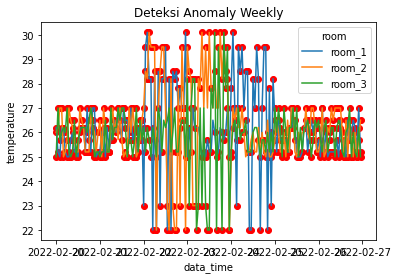

In [ ]:
#Visualisasi data Anomaly Weekly
fig, ax = plt.subplots()
a = df_temp_week.loc[df_temp_week['anomaly'] == 'Anomaly', ['data_time', 'temperature']]
sns.lineplot(x='data_time',y='temperature',hue='room',data=df_temp_week).set_title('Detection Anomaly Weekly')
ax.scatter(a['data_time'],a['temperature'], color='red')#memberi tanda data anomaly
plt.show()

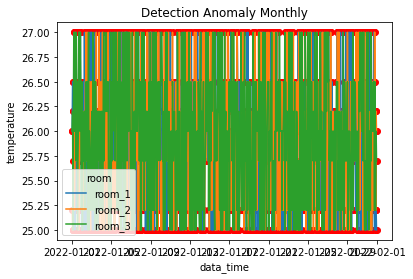

In [ ]:
#Visualisasi data Anomaly Weekly
fig, ax = plt.subplots()
a = df_temp_month.loc[df_temp_month['anomaly'] == 'Anomaly', ['data_time', 'temperature']]
sns.lineplot(x='data_time',y='temperature',hue='room',data=df_temp_month).set_title('Detection Anomaly Monthly')
ax.scatter(a['data_time'],a['temperature'], color='red') #memberi tanda data anomaly
plt.show()